In [901]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [902]:
df=pd.read_csv('train[1].csv')

In [903]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [904]:
df.shape

(1460, 81)

In [905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [906]:
df.isnull().sum().sort_values(ascending=False)[:15]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
dtype: int64

<AxesSubplot:>

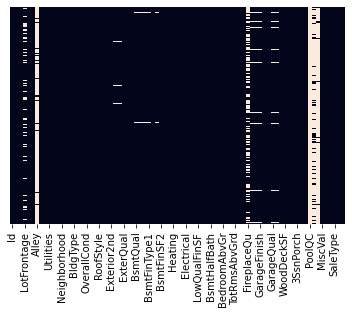

In [907]:
#cbar is for colorbar whioch appears on side and, yticklabels is for y-axis labels

sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

# filling na and dropping cols


In [908]:
#fillinf na values

df['LotFrontage'].skew()

2.163569142324884

In [909]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','Id','FireplaceQu'],axis=1, inplace=True)

In [910]:
#function for filling all object null values
def fillingna(df2):
    list1=df2[df2[0]=='object'].index
    print(list1)
    for a in list1:
        print(df[a].isnull().sum())
        df[a].fillna(df[a].mode()[0], inplace=True)
        print(df[a].isnull().sum())
        

In [911]:
df.shape

(1460, 75)

In [912]:
df.shape

(1460, 75)

In [913]:
fillingna(pd.DataFrame(df.dtypes))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
0
0
0
37
0
37
0
38
0
37
0
38
0
0
0
0
0
0
0
1
0
0
0
0
0
81
0
81
0
81
0
81
0
0
0
0
0
0
0


In [914]:
#LotFrontage is skewed so we will replace na values by median

df['LotFrontage'].fillna(df.LotFrontage.median(), inplace=True)

In [915]:
df['LotFrontage'].isnull().sum()

0

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

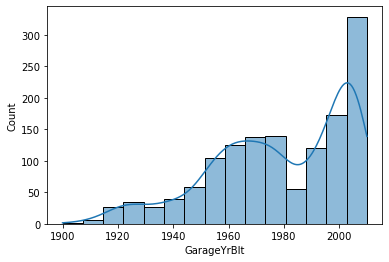

In [916]:
sns.histplot(df['GarageYrBlt'], kde=True)

In [917]:
df['GarageYrBlt'].fillna(df.GarageYrBlt.median(), inplace=True)

In [918]:
df.isnull().sum().sort_values(ascending=False)[:15]

MasVnrArea      8
MSSubClass      0
HalfBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
HeatingQC       0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
dtype: int64

In [919]:
df['MasVnrArea'].dtype

dtype('float64')

In [920]:
df['MasVnrArea'].skew()

2.669084210182863

In [921]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [922]:
df.isnull().sum().sort_values(ascending=False)[:15]

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

In [923]:
df.shape

(1460, 75)

<AxesSubplot:>

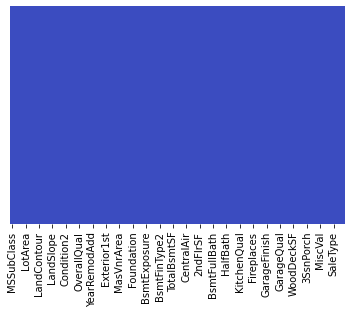

In [924]:
sns.heatmap(df.isnull(), cbar=False,yticklabels=False, cmap='coolwarm')

In [925]:
df.shape

(1460, 75)

# get dummies function or OHT

In [926]:
def getdummies(multcols):
    df_final=final_df
    i=0
    for a in multcols:
        
        df2=pd.get_dummies(final_df[a], drop_first=True)
        
        final_df.drop(a, axis=1, inplace=True)
        
        if i==0:
            df_final=df2.copy()
             
        else:
            df_final=pd.concat([df_final,df2], axis=1)
        i=i+1   
        
    df_final=pd.concat([final_df,df_final], axis=1)
    return df_final

In [927]:
df.shape

(1460, 75)

In [928]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [929]:
main_df=df.copy()

In [930]:
df_test=pd.read_csv('test_data.csv')

In [931]:
df_test.shape

(1459, 74)

In [932]:
final_df=pd.concat([df,df_test], axis=0)

In [933]:
final_df.shape

(2919, 75)

In [934]:
df1=pd.DataFrame(final_df.dtypes)
list1=list(df1[df1[0]=='object'].index)
type(list1)

list

In [935]:
df_new=getdummies(list1)

In [936]:
df_new.shape

(2919, 233)

In [939]:
final_df.columns.duplicated

<bound method Index.duplicated of Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')>

In [940]:
df_new=df_new.loc[:,~df_new.columns.duplicated()]

In [942]:
df_new.shape

(2919, 177)